In [1]:
from sklearn.datasets import load_wine
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np

In [2]:
df = pd.read_csv("/Users/swarchol/Research/seal/data/updated_renamed.csv")

In [3]:
df

,CellID,DNA,DNA (2),DNA (3),CD3,CD45RO,DNA (4),Pan-cytokeratin,Aortic smooth muscle actin,DNA (5),...,Orientation,Sample,Condition,Replicate,emb1,emb2,cluster_2d,UMAP_X,UMAP_Y,kmeans
0,47,15160.563636,46937.436364,42258.036364,0.235838,0.446541,24461.163636,0.270726,0.175902,29225.363636,...,-1.345788,WD-76845-097,CRC,1,8.872235,19.100700,-1,16034.611561,20497.943539,3
1,49,11740.781250,50723.343750,37632.750000,0.227137,0.584889,20075.703125,0.307917,0.174437,23681.062500,...,-1.338040,WD-76845-097,CRC,1,8.379912,20.137026,48,15764.366949,21180.248327,3
2,51,9565.513514,35690.567568,27032.162162,0.200757,0.436587,14392.621622,0.223040,0.162788,16623.810811,...,-1.475095,WD-76845-097,CRC,1,8.799885,19.362713,-1,15994.897394,20670.449801,3
3,52,7308.113636,24641.750000,19214.886364,0.228204,0.662923,9205.522727,0.272994,0.207245,11968.636364,...,-1.390750,WD-76845-097,CRC,1,8.504932,20.219538,48,15832.992590,21234.573253,3
4,53,19249.623188,57667.202899,53509.811594,0.261224,0.704192,30691.275362,0.295741,0.296045,35399.927536,...,-1.441929,WD-76845-097,CRC,1,8.576233,20.350970,48,15872.130942,21321.106528,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933248,1242746,18694.276596,18604.936170,17079.659574,0.248739,0.205520,6982.680851,0.136490,0.334573,9554.489362,...,-0.935988,WD-76845-097,CRC,1,18.186203,2.827556,72,21147.209738,9783.897947,2
933249,1242748,31240.095238,34545.301587,32678.349206,0.361773,0.381520,12513.238095,0.219673,0.126889,17597.158730,...,0.459917,WD-76845-097,CRC,1,11.654654,19.720820,-1,17561.929764,20906.223217,3
933250,1242751,45004.015873,47513.269841,44139.714286,0.229271,0.467404,16901.253968,0.152905,0.283555,20190.285714,...,0.830085,WD-76845-097,CRC,1,18.262630,3.071928,72,21189.161841,9944.789517,11
933251,1242753,33568.983607,35640.344262,31911.131148,0.233328,0.515689,12369.524590,0.134693,0.331565,15530.245902,...,-1.363981,WD-76845-097,CRC,1,19.307392,3.061911,72,21762.649778,9938.194640,2


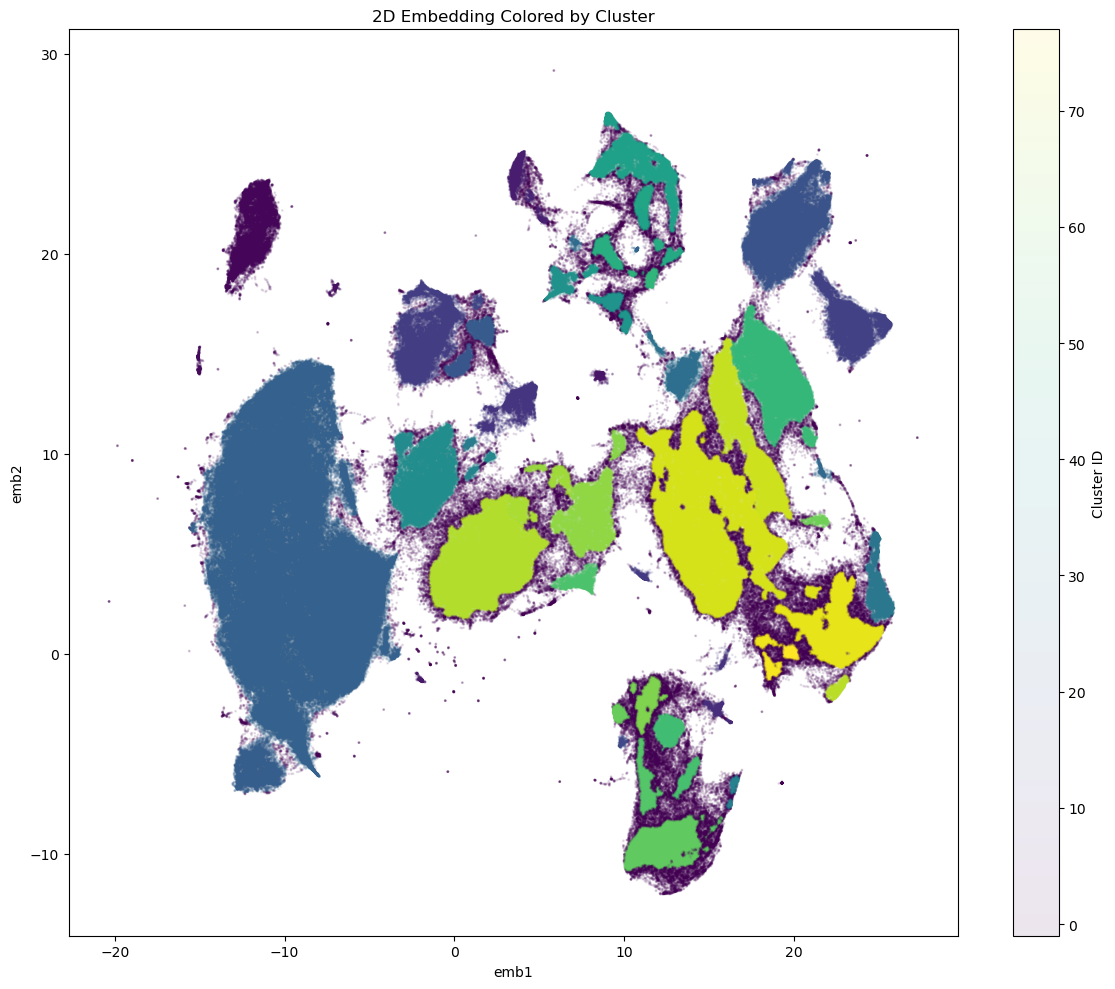

In [5]:
# Create a scatterplot of the data using emb1 and emb2 coordinates, colored by cluster_2d
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df['emb1'], df['emb2'], c=df['cluster_2d'],
                     alpha=0.1, s=1, edgecolors=None)
plt.colorbar(scatter, label='Cluster ID')
plt.title('2D Embedding Colored by Cluster')
plt.xlabel('emb1')
plt.ylabel('emb2')
plt.tight_layout()
plt.show()


In [6]:
df.columns

Index(['CellID', 'DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen', 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation',
       'Sample', 'Condition', 'Replicate', 'emb1', 'emb2', 'cluster_2d',
       'UMAP_X', 'UMAP_Y', 'kmeans'],
      dtype='object')

In [ ]:
feature_columns = [ 'DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
'Collagen']

# umap this and show it

import umap

umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(df[feature_columns])

# Create a scatterplot of the UMAP results
plt.figure(figsize=(12, 10))
scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df['cluster_2d'],
                     alpha=0.1, s=1, edgecolors=None)
plt.colorbar(scatter, label='Cluster ID')
plt.title('UMAP Embedding Colored by Cluster')
plt.xlabel('UMAP_X')
plt.ylabel('UMAP_Y')

/Users/swarchol/mambaforge/envs/jupyter/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
